# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import test data
mart_test = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
mart_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [3]:
# import train data
mart_train = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
mart_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis (EDA)

In [4]:
# checking the number of data points
mart_train.shape

(8523, 12)

In [5]:
# getting some information about the dataset
mart_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Categorical Features:

Item_Identifier : categories of different products

Item_Fat_Content :Product has high fat content or low fat content or regular fat content

Item_Type : Types of product is meat or soft drink & such kind of things

Outlet_Identifier :  unique ID of the products

Outlet_Size :size of product is medium,high or small

Outlet_Location_Type : Location in in tier 1 or tier 2 & such kind of things

Outlet_Type :  It is supermarket or grocerry store

In [6]:
# checking for missing values
mart_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

 Observation is we are having 1463 missing values in the Item_Weight column and 2410 missing values in the Outlet_Size column

Replacing the missing values in the "Item_Weight"column

In [7]:
# mean value of "Item_Weight" 
mart_train['Item_Weight'].mean()

12.857645184136183

In [8]:
# filling the missing values in "Item_weight column" 
mart_train['Item_Weight'].fillna(mart_train['Item_Weight'].mean(), inplace=True)

Replacing the missing values in the "Outlet_Size"column

In [9]:
# mode of "Outlet_Size" column
mart_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [10]:
Outlet_size1 = mart_train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [11]:
print(Outlet_size1)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [12]:
miss_values = mart_train['Outlet_Size'].isnull()

In [13]:
print(miss_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


True represents a particular value is missing

In [14]:
mart_train.loc[miss_values, 'Outlet_Size'] = mart_train.loc[miss_values,'Outlet_Type'].apply(lambda x: Outlet_size1[x])

In [15]:
# checking for missing values
mart_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

now we don't have any missing values.

In [16]:
mart_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# DATA VISUALIZATION

C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


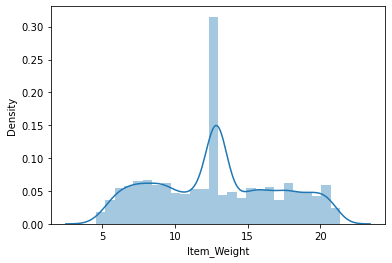

In [17]:
# Item_Weight distribution
sns.distplot(mart_train["Item_Weight"])
plt.show()

 item weight from 5 Kg to 20 Kg &  maximum values around 12 Kg

C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


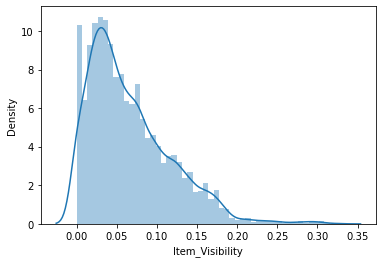

In [18]:
# Item_Visibility distribution
sns.distplot(mart_train["Item_Visibility"])
plt.show()

Item_Visibility feature is positively skewed

C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


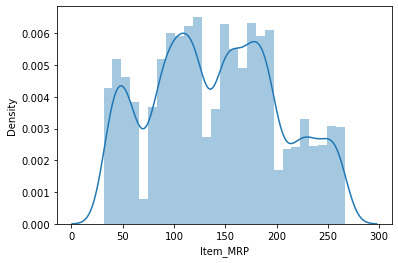

In [19]:
# Item_MRP distribution
sns.distplot(mart_train["Item_MRP"])
plt.show()

There is good amount of product present in MRP 50,100,150 and MRP range starts from 31 to 266

C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


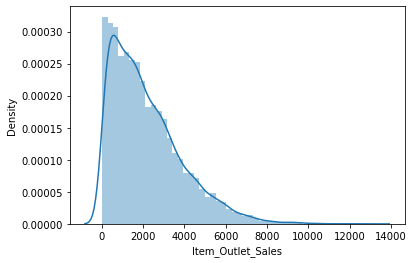

In [20]:
# Item_Outlet_Sales distribution
sns.distplot(mart_train["Item_Outlet_Sales"])
plt.show()

Item_Outlet_Sales feature is positively skewed

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

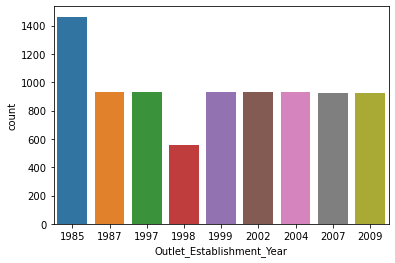

In [21]:
# Outlet_Establishment_Year count plot.
sns.countplot(data=mart_train, x='Outlet_Establishment_Year')

In 1985 max number of outlets establishment is done and least is in 1998, in other years are same .


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

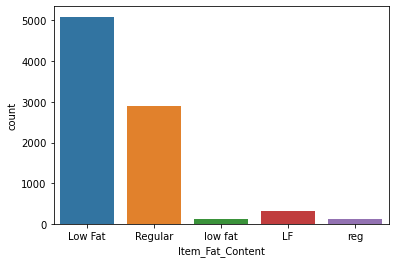

In [22]:
sns.countplot(x='Item_Fat_Content', data=mart_train)

columns such as Low fat,low fat & Lf which is same & must be put into a single particular label.

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

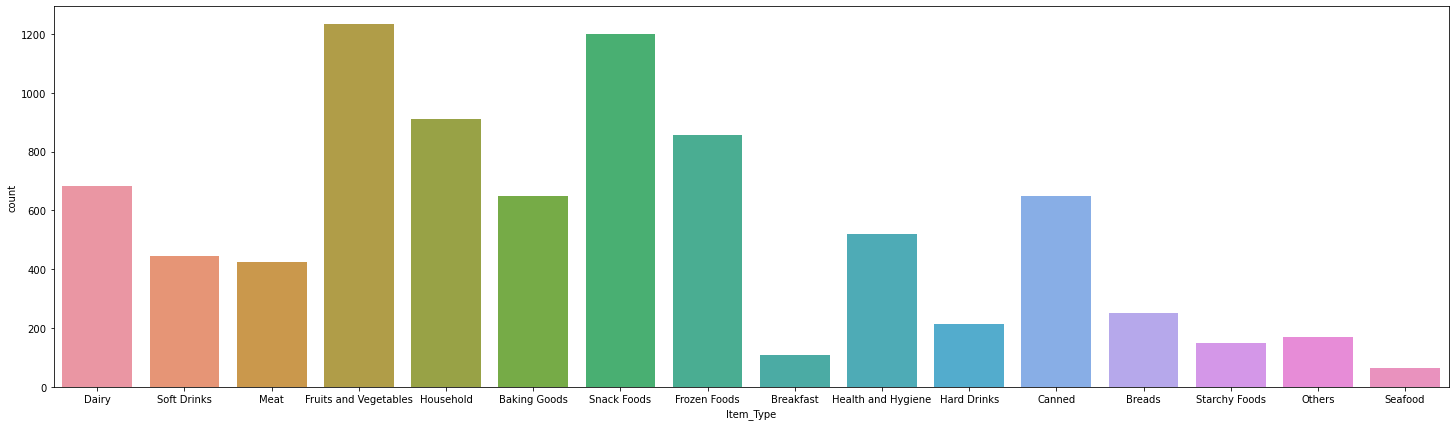

In [23]:
plt.figure(figsize = (25,7), facecolor = 'white')
sns.countplot(x='Item_Type', data=mart_train)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

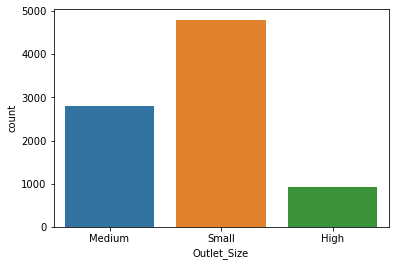

In [24]:
sns.countplot(x='Outlet_Size', data=mart_train)

Three outlet_Size in this case which is medium, small & high

# PREPROCESSING OF DATA

In [25]:
mart_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [26]:
mart_train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
mart_train.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [28]:
mart_train['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [29]:
#  Way to turn categorical data to numerical is by using Ordinal Encoder.
from sklearn.preprocessing import OrdinalEncoder
onc =  OrdinalEncoder()
for i in mart_train.columns:
    if mart_train[i].dtypes == 'object':
        mart_train[i] = onc.fit_transform(mart_train[i].values.reshape(-1,1))


In [30]:
mart_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.920,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.500,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.200,1.0,0.000000,6.0,182.0950,0.0,1998,2.0,2.0,0.0,732.3800
4,1297.0,8.930,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,0.0,0.056783,13.0,214.5218,1.0,1987,0.0,2.0,1.0,2778.3834
8519,897.0,8.380,1.0,0.046982,0.0,108.1570,7.0,2002,2.0,1.0,1.0,549.2850
8520,1357.0,10.600,0.0,0.035186,8.0,85.1224,6.0,2004,2.0,1.0,1.0,1193.1136
8521,681.0,7.210,1.0,0.145221,13.0,103.1332,3.0,2009,1.0,2.0,2.0,1845.5976


In [31]:
corr = mart_train.corr()
corr

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001229,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.014105,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.001262,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.094025,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.000218,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.000872,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.260272,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.425534,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001229,-0.014105,-0.001262,0.094025,-0.000218,0.000872,0.260272,0.425534,1.000000,-0.480075,-0.401373,-0.162753
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.480075,1.000000,0.467219,0.089367


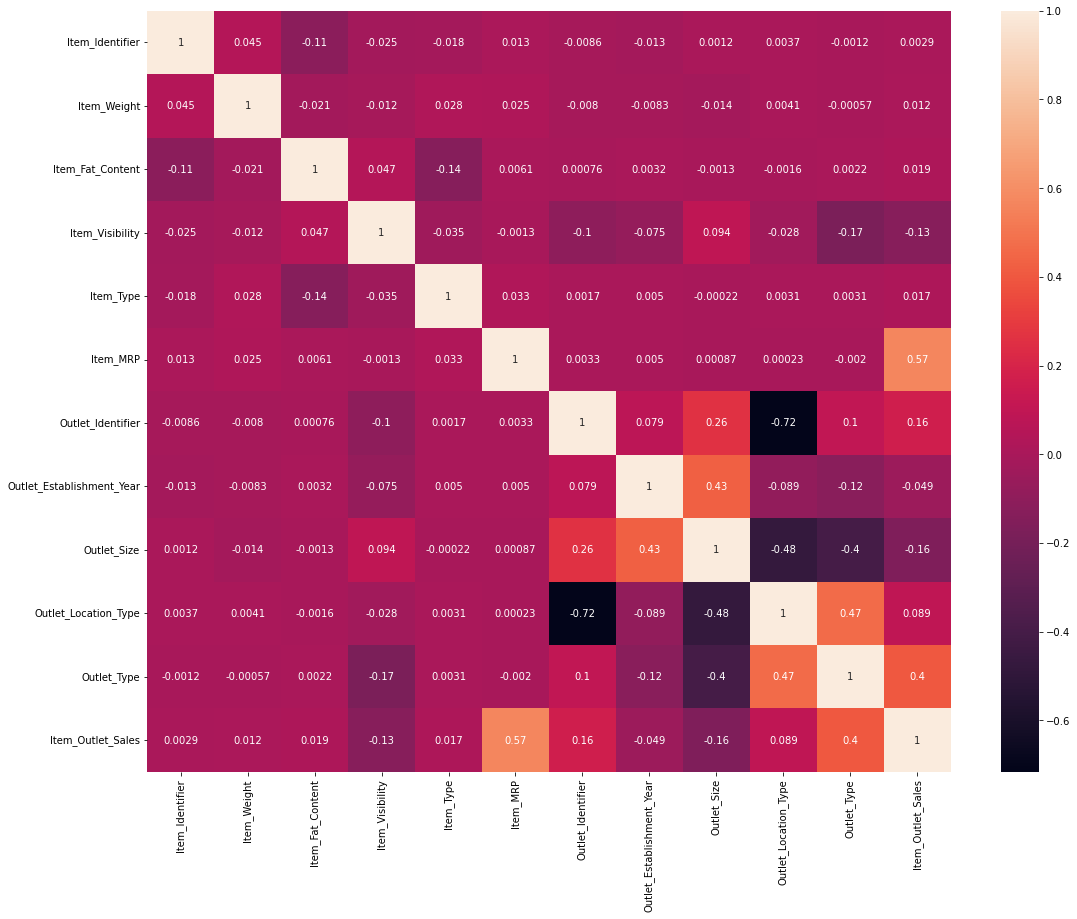

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,14))
sns.heatmap(corr,annot = True)
plt.show()

In [33]:
 mart_train.skew().sort_values()

Outlet_Size                 -0.861866
Outlet_Establishment_Year   -0.396641
Outlet_Location_Type        -0.209093
Outlet_Identifier           -0.059861
Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Type                    0.101655
Item_MRP                     0.127202
Item_Fat_Content             0.616705
Outlet_Type                  0.927438
Item_Visibility              1.167091
Item_Outlet_Sales            1.177531
dtype: float64

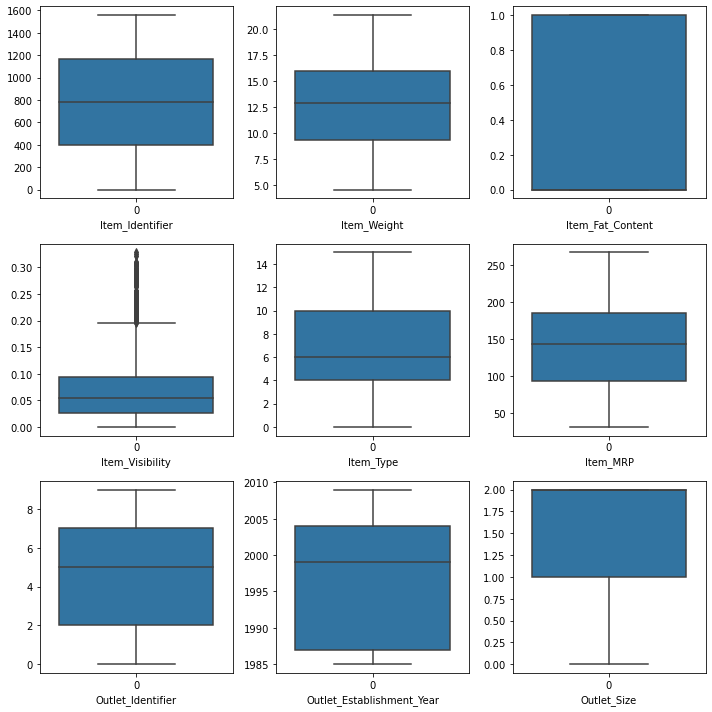

In [34]:
plt.figure(figsize = (10,10), facecolor = 'white')
i = 1
for columns in mart_train:
    if i<=9:
        ax = plt.subplot(3,3,i)
        sns.boxplot(data = mart_train[columns])
        plt.xlabel(columns,fontsize = 10)
    
    i+=1
    plt.tight_layout()

SPLITTING FEATURES AND TARGET INTO X & Y RESPECTIVELY

In [35]:
x = mart_train.drop(['Item_Outlet_Sales'], axis=1)
y = mart_train['Item_Outlet_Sales']

In [36]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [40]:
xgb = XGBRegressor()

In [41]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 3)

In [42]:
from sklearn.metrics import r2_score

In [43]:
xbg = XGBRegressor()

In [44]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [45]:
 pred_train = xgb.predict(x_train)

In [46]:
pred_test = xgb.predict(x_test)

In [47]:
# Learning Rate
r2_score(y_train, pred_train)

0.8496380666472023

In [48]:
# Testing Rate
r2_score(y_test,pred_test)*100

56.093378069108255

In [49]:
from sklearn.ensemble import  RandomForestRegressor

In [50]:
rf = RandomForestRegressor()

In [51]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [52]:
pred_train = rf.predict(x_train)

In [53]:
pred_test = rf.predict(x_test)

In [54]:
# Learning Rate
r2_score(y_train, pred_train)

0.9368975818857914

In [55]:
# Testing Rate
r2_score(y_test,pred_test)*100,1

(59.031855010349176, 1)

In [56]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor()

In [57]:
kn.fit(x_train,y_train)

KNeighborsRegressor()

In [58]:
pred_train = kn.predict(x_train)

In [59]:
pred_test = kn.predict(x_test)

In [60]:
# Learning Rate
r2_score(y_train, pred_train)

0.4537525926000373

In [61]:
# Testing Rate 
r2_score(y_test,pred_test)*100

21.850603085324394

In [62]:
from sklearn.ensemble import  GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [63]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [64]:
pred_train = gbr.predict(x_train)

In [65]:
pred_test = gbr.predict(x_test)

In [66]:
# Learning Rate
r2_score(y_train, pred_train)

0.628137032114495

In [67]:
# Testing Rate 
r2_score(y_test,pred_test)*100

63.014312409924585

Cross-validation is a technique in which we train our model using the subset of the data-set and then evaluate using the complementary subset of the data-set.

In [68]:
from sklearn.model_selection import cross_val_score
src = cross_val_score(xgb,x,y,cv = 7)
print(src.mean())

0.523097729002494


In [69]:
src = cross_val_score(kn,x,y,cv = 7)
print(src.mean())

0.18509058413013543


In [70]:
src = cross_val_score(rf,x,y,cv = 7)
print(src.mean())

0.5531970795986163


In [71]:
src = cross_val_score(gbr,x,y,cv = 7)
print(src.mean())

0.5956851829366646


GradientBoosting Regressor gives highest r2 score of 63%

# Hyperparameter Tuning

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

In [73]:
params = {
    "n_estimators": [1, 2, 5, 10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": loguniform(0.01, 1),
}

In [74]:
rnd_search = RandomizedSearchCV(GradientBoostingRegressor(),cv = 5, param_distributions = params)

In [75]:
rnd_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001CFDD36EE20>,
                                        'max_leaf_nodes': [2, 5, 10, 20, 50,
                                                           100],
                                        'n_estimators': [1, 2, 5, 10, 20, 50,
                                                         100, 200, 500]})

In [76]:
rnd_search.best_estimator_

GradientBoostingRegressor(learning_rate=0.3774596646158572, max_leaf_nodes=10,
                          n_estimators=50)

In [78]:
gbc = GradientBoostingRegressor(learning_rate=0.3774596646158572, max_leaf_nodes=10,n_estimators=50)
gbc.fit(x_train,y_train)
y_pred = gbc.predict(x_test)
acc = r2_score(y_test,y_pred)
print(acc)

0.6127823943583703


In [79]:
x.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [80]:
coef3 = pd.Series(gbc.feature_importances_, x.columns).sort_values(ascending=False)
coef3

Item_MRP                     0.525682
Outlet_Type                  0.398486
Outlet_Establishment_Year    0.028426
Item_Visibility              0.016378
Item_Identifier              0.010781
Item_Weight                  0.009259
Outlet_Identifier            0.004323
Item_Type                    0.003353
Outlet_Location_Type         0.002058
Outlet_Size                  0.001088
Item_Fat_Content             0.000166
dtype: float64

Properties of products and stores which play a key role in increasing the sales of their products are Item MRP and Outlet Type

# BUILDING A PREDICTIVE SYSTEM

In [82]:
input_data = (156, 9.300, 0, 0.016047, 4, 249.8092, 9, 1999,1, 0, 1)
print("The sales for the first product in the dataset is predicted as ",  gbr.predict(x_test)[0])

The sales for the first product in the dataset is predicted as  2846.4930055352156


In [85]:
import joblib
joblib.dump(r2_score,"Big_Data_Mart_Sales_Problem.pkl")

['Big_Data_Mart_Sales_Problem.pkl']